# ***FINAL PROJECT***
Francesca Sotgia - 513067

The aim of the project is to train a Neural Network for Breast Cancer Classification.

The goal is to correctly classify an image into one of the two categories: Cancer or Not Cancer.

Breast cancer is the most common type of cancer in women and it is characterized by an abnormal growth of breast cells. If not treated, the tumors can spread throughout the body and become letal. For this reason early detection is crucial in this framework.  

## **Import libraries and data**

Import all the required libraries and the dataset.

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from itertools import dropwhile

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from scikeras.wrappers import KerasClassifier

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

from sklearn.datasets import load_breast_cancer

In [ ]:
# Fix randomness for reproducibility
seed = 42
np.random.seed(seed)     # For reproducibility (sets the global random seed in NumPy)
tf.random.set_seed(seed) # For reproducibility (sets the global random seed in TensorFlow)

In [ ]:
# Don't show warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scikeras.wrappers")

###Import the dataset

For this project we will use the *Diagnostic Winsconsin Breast Cancer Database*.

The features contained in the database are computed from a digitalized images of a Fine Needle Aspirate (FNA) of breast mass. The features describe the characteristics of the cell nuclei present in the image.

In [ ]:
# Load the dataset
data = load_breast_cancer()

X = data.data
y = data.target

# Transform data into a Panda dataframe
data = pd.DataFrame(data=np.c_[X, y], columns=list(data.feature_names) + ['target'])

# Divide the dataset into data and target
X = data.drop('target', axis=1)
y = data["target"]

## **Inspect data**

Inspect the data to understand the structure of the dataset, the number of columns and what they represent.

While inspecting the data, also check if there are missing values and if the target classes are balanced.

In [ ]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


We can observe that the database contains multiple features that are extracted from the tumor cells.

The features describe different characterisitcs of the tumor cell such as its shape, size, margianal adhesio, chromatin pattern and mitoses.

Get informations about the columns of the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We can observe that the dataset contains 31 columns of dtype float64.

In [ ]:
# Inspect the data
print(f"X shape: {X.shape}")
X

X shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Inspect the target
print(f"y shape: {y.shape}")
print(f"y dtype: {y.dtype}")
y

y shape: (569,)
y dtype: float64


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
564,0.0
565,0.0
566,0.0
567,0.0


Transform y from float to integer.

In [ ]:
y = y.astype('int')
print(f"y dtype: {y.dtype}")

y dtype: int64


We can observe that the target contains only values 0 and 1 that are the labels for a binary classification.

The labels tells us whether a tumor is malignant or benign.

The labels are used to train the model and after training they are used to evaluate the goodness of the system.

### Check the correlation between the features

By using a **correlation heatmap**, we can understand how much the features in the dataset are correlated to one another. The darker the color, the stronger the relationship between two features.



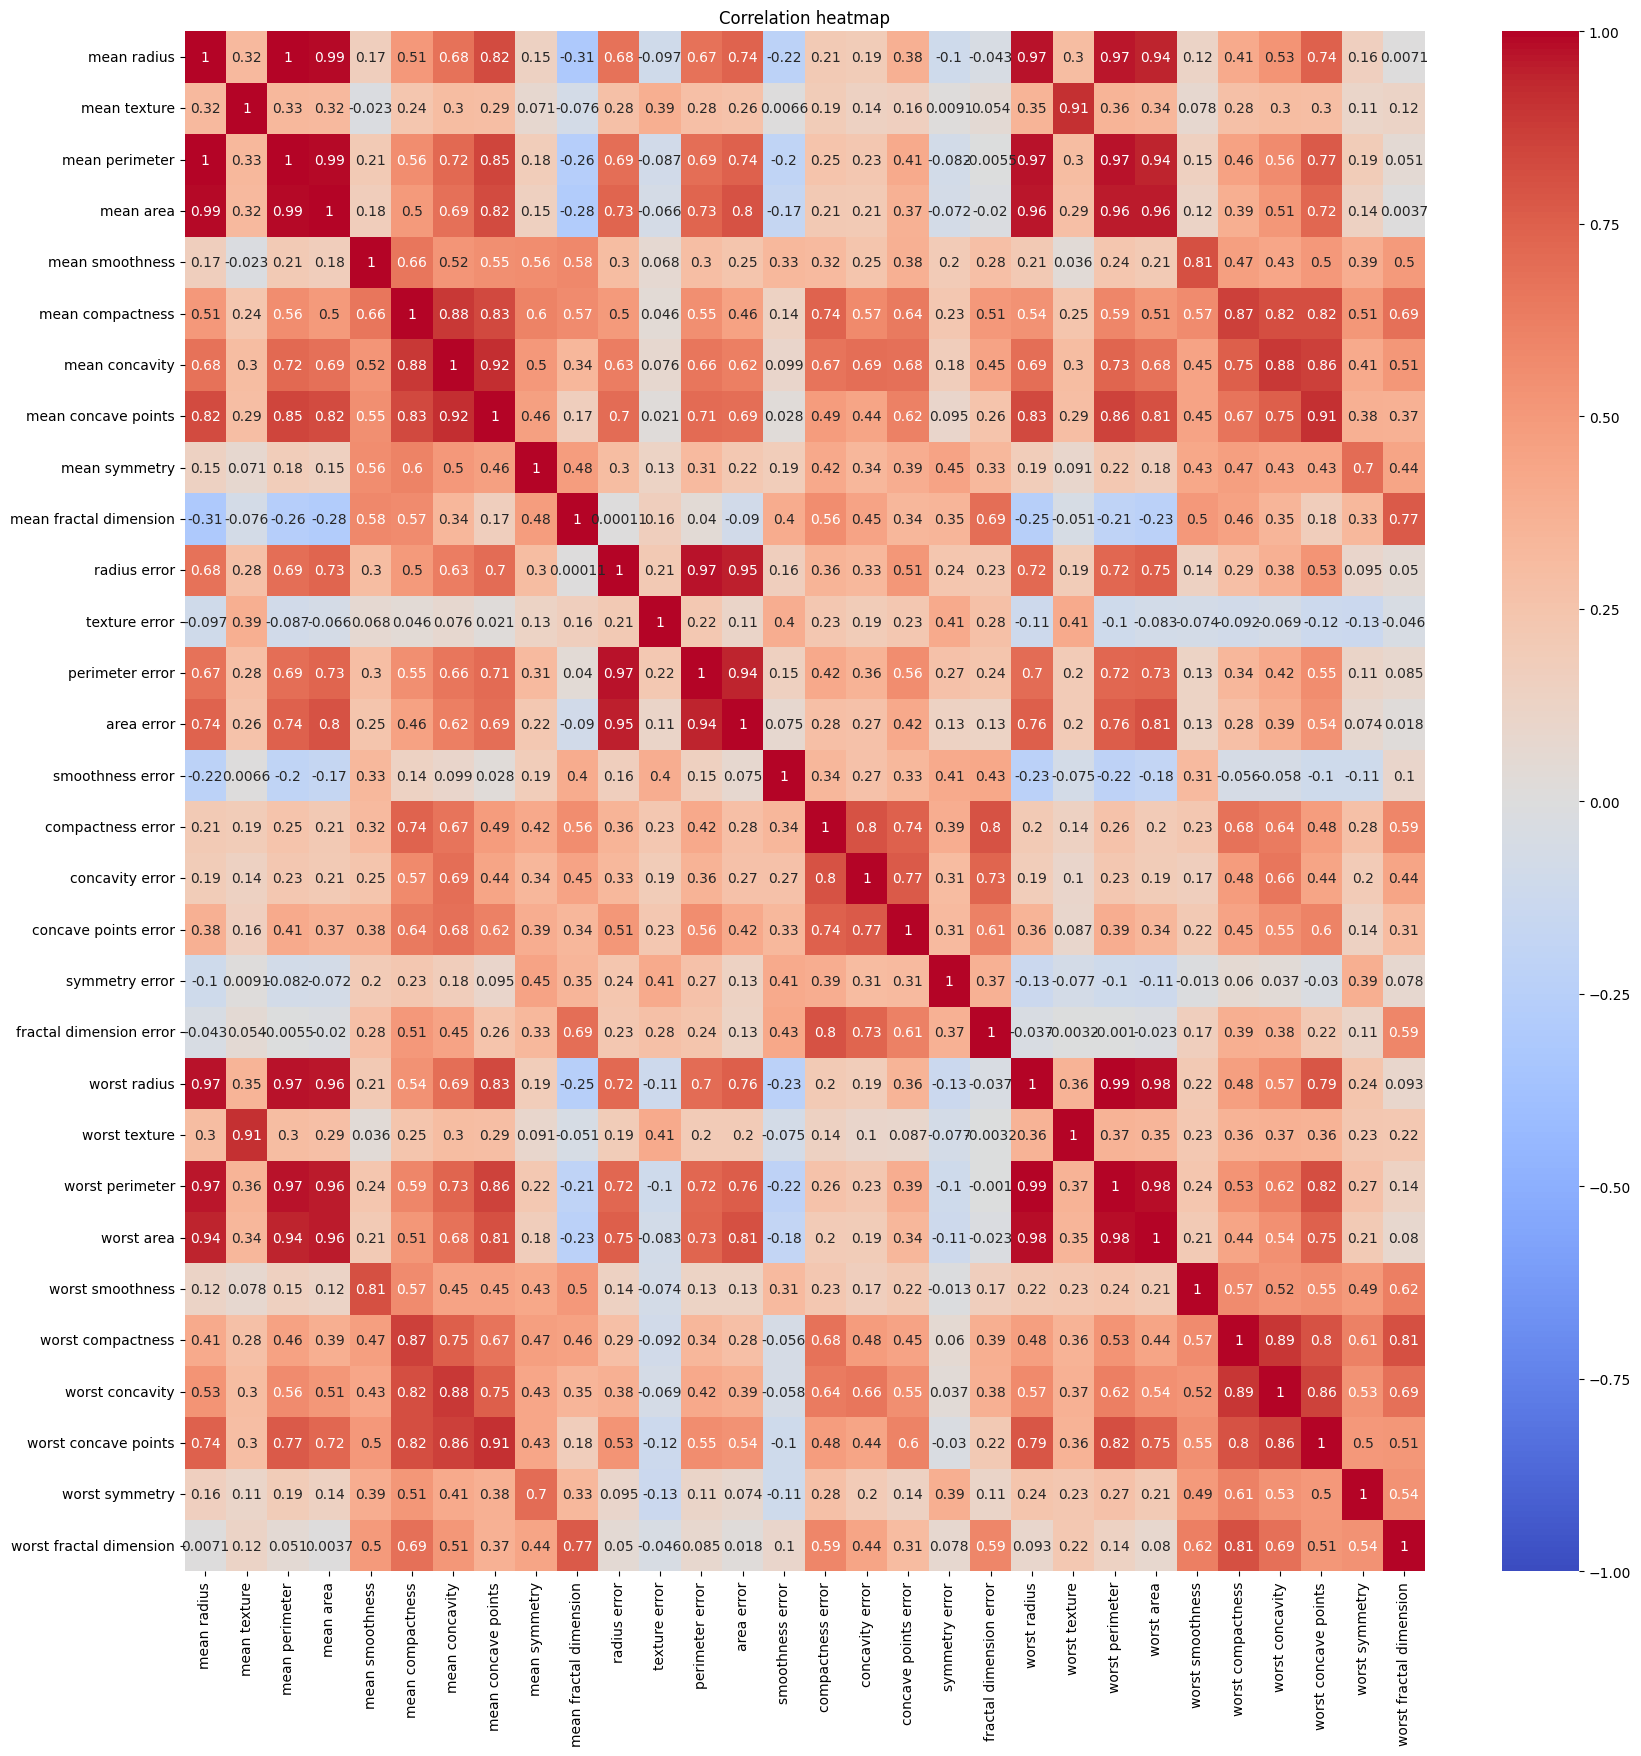

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

### Check missing values
It is important to identify missing values in a dataset to undestand which rows and columns may be dropped or modified.

In [ ]:
data.isnull().sum(axis=0)

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


We can observe that the dataset does not contain missing values.

### Check class imbalance

We want to unique values of the target variable (labels) and count them. In this way we can understand if the classes are balanced or unbalanced.

In [ ]:
# Get unique values of the labels
unique, counts = np.unique(y, return_counts=True)

print('Target labels:',unique)
for i,u in enumerate(unique):
    print(f'Label {unique[i]} has {counts[i]} samples')

Target labels: [0 1]
Label 0 has 212 samples
Label 1 has 357 samples


Visualize the target balance as histogram.

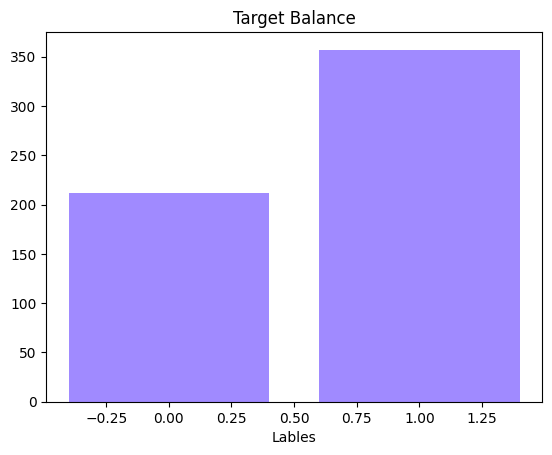

In [ ]:
# Plot the histogram
target_count = y.value_counts()
plt.bar(target_count.index, target_count, color=['#a08aff'])
plt.title('Target Balance')
plt.xlabel('Lables')
plt.show()

We can observe that the class 1 has more samples with respect to the class 0 but the dataset is not highly imbalanced.

### Divide into train, validation and test sets

- The **train set** is used to train the model, so the system will use this data to learn the parameters.

- The **validation set** contains the data used for model selection.

- The **test set** acts as unseen data and it's used to assess the final model performance.

In this case the train set is going to be 80% of the dataset and both the validation and test sets are going to be the 10%.

First, divide the dataset into a combination of train and validation and separate the test set

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,                 # Input data
    y,                 # Target variable (labels)
    test_size = 0.1,   # Size of the test set (10%)
    stratify=y,        # The class distribution in y is maintained in both test and train sets
    shuffle=True,      # Shuffle the data before splitting
    random_state=seed  # Controls the randomness
)

Then split the combined set into train and validaton sets.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,             # Input data
    y_train_val,             # Target variable
    test_size = len(X_test), # Validation set size equal to test set size
    stratify=y_train_val,    # Maintain the same class distribution
    shuffle=True,            # Shuffle the data before splitting
    random_state=seed        # Controls the randomness
)

In [ ]:
# Print the shapes of the sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 30), y_train shape: (455,)
X_val shape: (57, 30), y_val shape: (57,)
X_test shape: (57, 30), y_test shape: (57,)


Create the plots to visualize how the target variable values are distributed in the three sets. We expect them to be distributed equally across the sets since we forced them to have the same distribution with `stratify=y`.

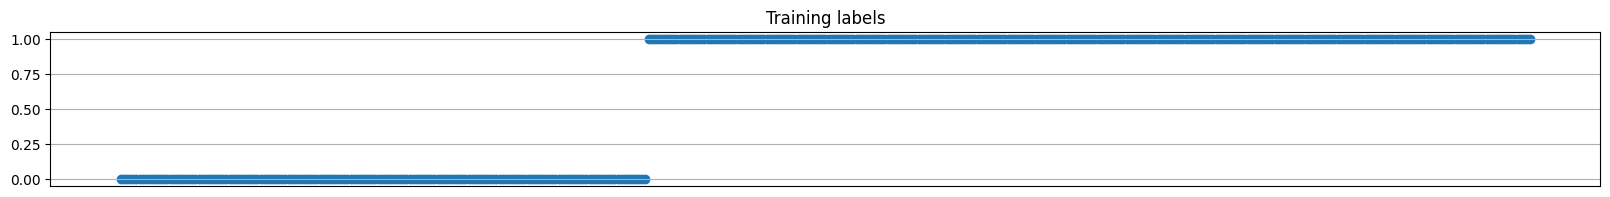

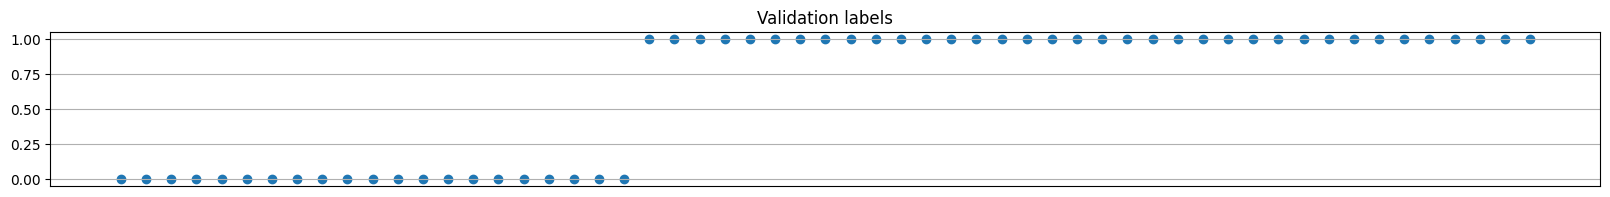

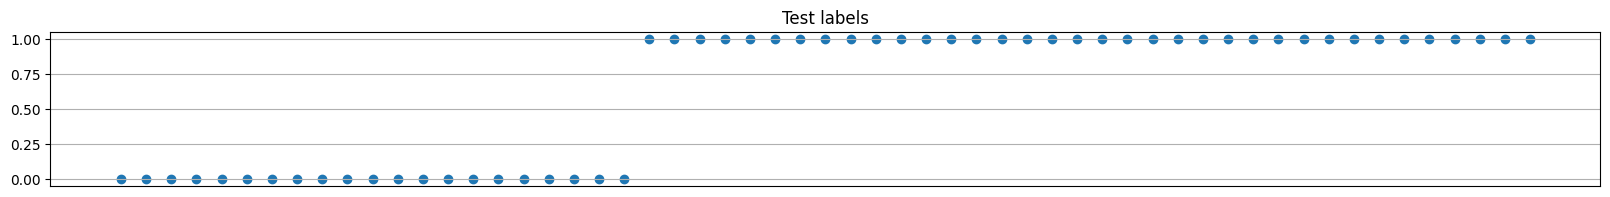

In [ ]:
# Training
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_train)), np.sort(y_train, axis=0))
plt.title('Training labels')
plt.xticks([])
plt.grid(0.2)

# Validation
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_val)), np.sort(y_val, axis=0))
plt.title('Validation labels')
plt.xticks([])
plt.grid(0.2)

# Test
plt.figure(figsize=(20, 2))
plt.scatter(np.arange(len(y_test)), np.sort(y_test, axis=0))
plt.title('Test labels')
plt.xticks([])
plt.grid(0.2)

plt.show()

As expected, we can observe that the labels are distributed equally across the train, validation and test sets.

## Data processing

Start by getting the maximum and minimum values for the features of X on the three sets.

In [ ]:
# Get minimum values
print(f"Minimum value train: {X_train.min()}")
print(f"Minimum value val: {X_val.min()}")
print(f"Minimum value test: {X_test.min()}")

# Get maximum values
print(f"Maximum value: {X_train.max()}")
print(f"Maximum value val: {X_val.max()}")
print(f"Maximum value test: {X_test.max()}")

Minimum value train: mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.062510
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            

We would like to have values in range [0, 1], so we apply normalization.

Normalization is the process that scales all the values in the desired range.

We apply `MinMaxScaler`: it scales and translates each feature individually such that it is in the given range.

In [ ]:
# Normalization
scaler = MinMaxScaler()

# Apply the scaler to the features
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Build the model

Create auxiliary function for plotting training and validation accuracy over the epochs.


In [ ]:
# Empty dictionary to store metadata
metadata = {}

# Define a function for plotting training and validation Accuracy histories.
def plot_histories(metadata, training=False, baseline=False, show_all=False):

    print('VALIDATION ACCURACY')
    plt.figure(figsize=(21, 9))

    # Iterate through different models stored in metadata.
    for model in list(metadata.keys()):

        # Skip the baseline model if baseline flag is False.
        if model == 'Baseline' and not baseline:
            continue

        # Retrieve relevant information from the metadata dictionary.
        history = metadata[model]['history']
        patience = metadata[model]['patience']
        color = metadata[model]['color']
        val_score = metadata[model]['val_score']
        print('%s: %.4f' % (model, val_score))

        # Plot training and validation Accuracy histories with or without patience handling
        if patience != 0:
            if training:
                plt.plot(
                    history['accuracy'][:-patience],
                    alpha=0.5,
                    color=color
                )
                if show_all:
                    plt.plot(
                        np.arange(len(history['accuracy']) - patience - 1, len(history['accuracy'])),
                        history['accuracy'][-patience - 1:],
                        alpha=0.2,
                        color=color
                    )

            plt.plot(
                history['val_accuracy'][:-patience],
                label=model,
                alpha=0.9,
                color=color
            )
            if show_all:
                plt.plot(
                    np.arange(len(history['val_accuracy']) - patience - 1, len(history['val_accuracy'])),
                    history['val_accuracy'][-patience - 1:],
                    alpha=0.2,
                    color=color
                )

        else:
            if training:
                plt.plot(
                    history['accuracy'],
                    alpha=0.5,
                    color=color
                )
            plt.plot(
                history['val_accuracy'],
                label=model,
                alpha=0.9,
                color=color
            )

        # Set y-axis limits and add labels, legends, and grid.
        if training:
            plt.ylim(0.004, 0.0225)
        else:
            plt.ylim(0.01, 0.025)
        plt.title('Accuracy')
        plt.legend(loc='upper right')
        plt.grid(alpha=0.3)

    # Display the plot.
    plt.show()

Define parameters

In [ ]:
# Define input shape: shape of training samples
input_shape = X_train.shape[1:]

# Define batch size: number of training samples
batch_size = 64

# Define number of epochs: number of iterations
epochs = 1000


Start by defining the **hyperparameters**.

Hyperparameters are variables that are set before training and they define the structure and behavior of the system, controlling the learning process.

Hyperparameters can be fine-tuned (for example via grid search) across training runs to find the combination that produces the best results.




In [ ]:
# Define the learning rate: size of update step
learning_rate = 0.001

# Dropout rate: percentage of neurons deactivated
dropout_rate = 0.2

# Number of hidden layers
num_hidden = 2

# Number of neurons for each layer
num_neurons = 128

### Create the model
Build an artificial neural network for classification.

The model is composed by multiple dense layers, implemented with TensorFlow.

The **INPUT LAYER** encodes the input and set its expected shape.

The **HIDDEN LAYERS** are dense layers with ReLu activation that takes as input the output of the previous layer.
`ReLu` is used as activation function to introduce non-linearity and ensure better generalization of the model.
Add `HeUniform` initializer to initilize the weights for ReLu activation funtion.

After each dense layer, a **DROPOUT LAYER** is added to deactivate a given percentage of the neurons, called `dropout_rate`. The best percentage of deactivation will be selected with hyperparameter tuning. Dropout helps to generalize and thus avoid overfitting.

The **OUTPUT LAYER** is a dense layer with 1 unit (we are doing binary classification) and with `Sigmoid` activation, moreover it takes as input the output of the last hidden layer.

Sigmoid is used as activation function for the output layer because it is the most suitable for binary classification problems since it outputs a value between 0 and 1 (we will then set a threshold to have only values 0 and 1).

`Adam Optimizer` is implemented in the model to guarantee faster and effective learning during the training phase. The goal of the optimizer is to determine how to update weights based on the loss.

`Binary Cross Entropy` was used as LOSS FUNCTION because is the most suitable for binary classification problems. It measures the distance between the actual labels and the predicted ones.

The aim it to minimize the loss to have better predictions.

The evaluation metric used is `Accuracy`, since we are dealing with a binary classification problem.

In [ ]:
def create_model(learning_rate=learning_rate, dropout_rate=dropout_rate, num_hidden=num_hidden, num_neurons=num_hidden):
  # Input layer
  input = tf.keras.Input(shape = input_shape)

  # First hidden layer: Dense layer with 256 neurons and ReLu activation
  hid = tf.keras.layers.Dense(
      256,                # Number of neurons
      activation='relu',  # ReLu activation
      kernel_initializer = tfk.initializers.HeUniform(seed=seed))(input) # HeUniform initializer
  hid = tf.keras.layers.Dropout(dropout_rate)(hid)                       # Dropout layer

  # Hidden layers
  for i in range(num_hidden - 1): # Loop that defines the hidden layers, the number of layers will be defined during hyperparameter tuning
    hid = tf.keras.layers.Dense(
        num_neurons,
        activation='relu',
        kernel_initializer = tfk.initializers.HeUniform(seed=seed))(hid)
    hid = tf.keras.layers.Dropout(dropout_rate)(hid)

  # Output layer
  output = tf.keras.layers.Dense(1, activation='sigmoid')(hid) # Dense layers with 1 neuron and Sigmoid activation

  # Define the model
  model = tf.keras.Model(input, output)

  model.compile(
      optimizer = tfk.optimizers.Adam(learning_rate),  # Use Adam optimizer
      loss = tfk.losses.binary_crossentropy,           # Use binary_crossentropy
      metrics = ['accuracy']                           # Set accuracy as metric
      )

  return model

Create an instance of the model and visualize it.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 8,453 (33.02 KB)

 Non-trainable params: 0 (0.00 B)

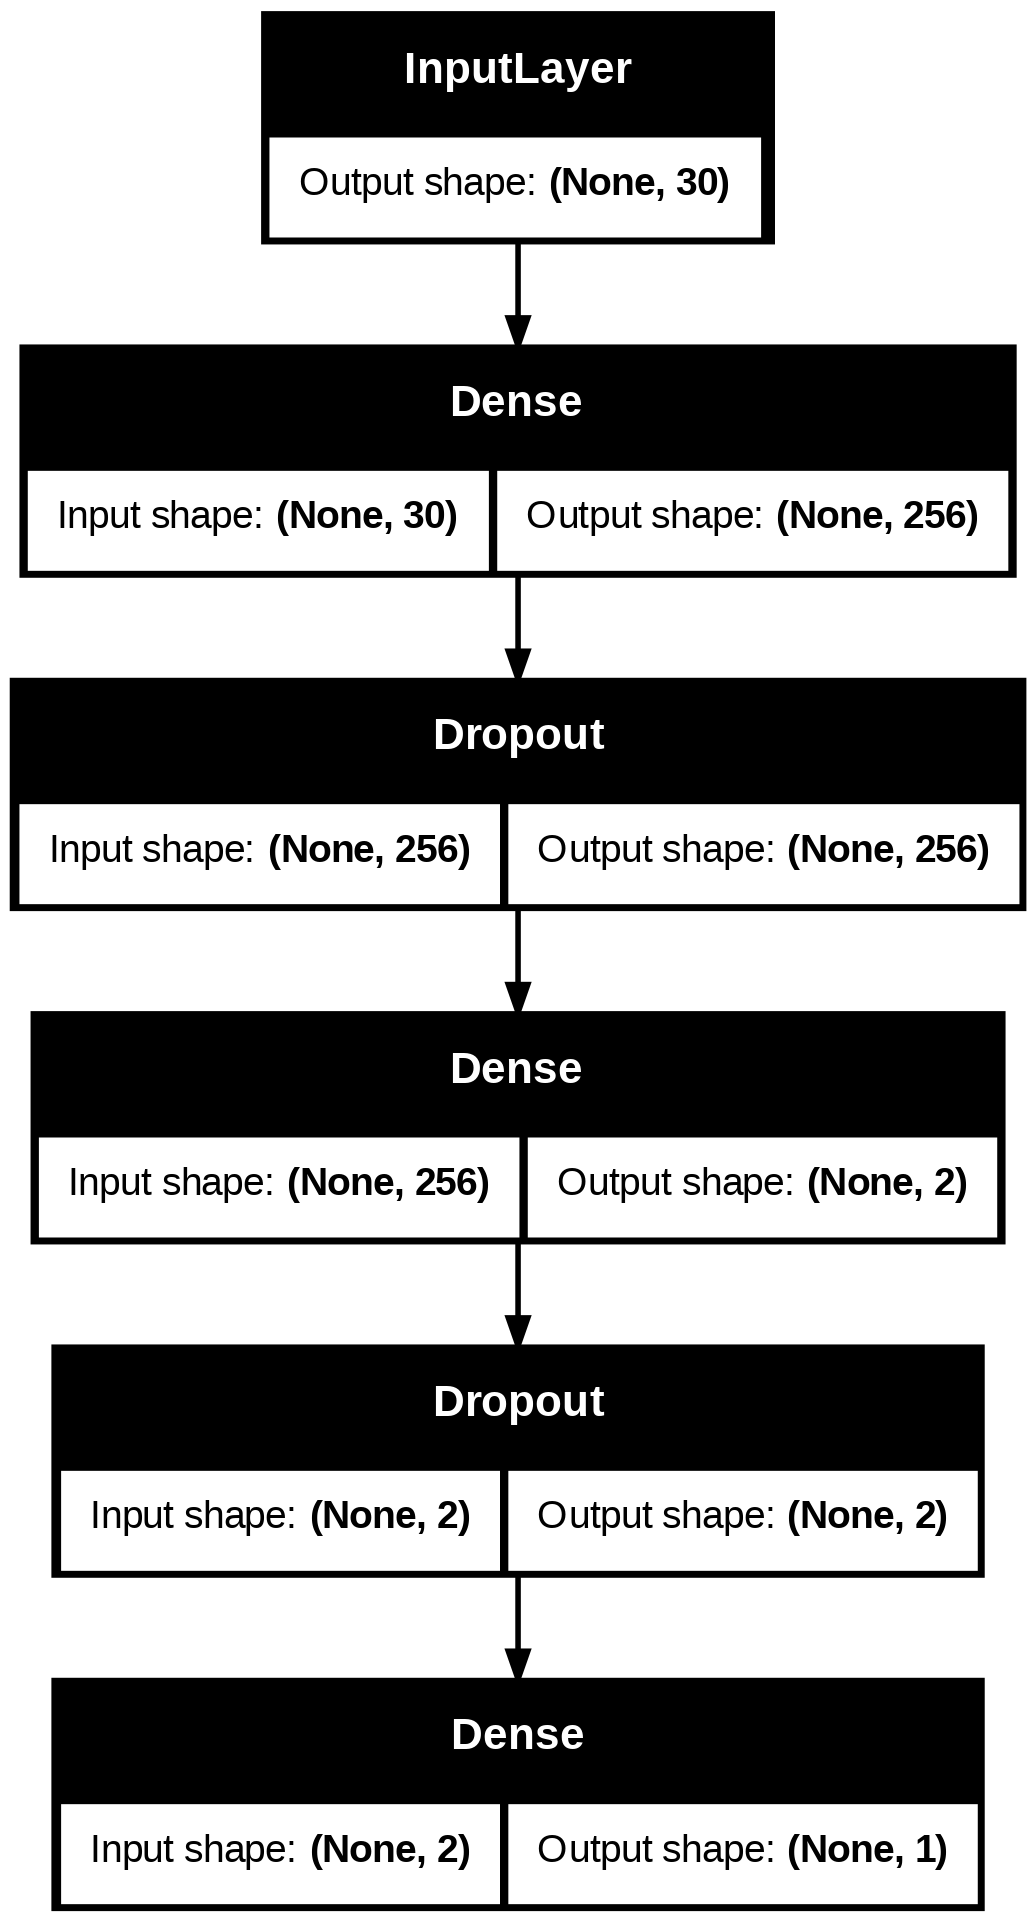

In [ ]:
model = create_model()
model.summary()
tfk.utils.plot_model(model, show_shapes=True, expand_nested=True)

### Hyperparameters tuning
During hyperparameter tuning the best combination of hyperparameters is chosen to obtain a model with optimal performance.

**GRID SEARCH** is implemented for hyperparameter tuning.

Since the scikit learn function `GridSearchCV` returned errors because the model was created with TensorFlow, we defined a function called `grid_serch` that acts as grid search.

The `grid_search` function
- Creates all combinations of hyperparameters
- For all the combinations it applies K-fold cross-validation to split data into different folds.
- For each fold, create a model using one of the hyperparameter comnbination, train it and evaluate it.
- Keep track of the best model (the one with the highest accuracy)
- Return the best hyperparameter combination, the best score and the best model, which is the one trained on the training set using the best combination.


In [ ]:
def grid_search(create_model, param_grid, X_train, y_train, cv=5, scoring='accuracy', verbose=1):
  # Initialize the best score, parametes and model
  best_score = -np.inf # Ensure that the first model set a valid score
  best_params = None
  best_model = None

  # Combinations of hyperparameters
  param_combinations = list(itertools.product(*param_grid.values()))

  # Display the number of combinations
  if verbose:
    print(f"Evaluate {len(param_combinations)} combinations \n")

  # Convert y_train to a NumPy array
  y_train_np = y_train.values

  # Consider all combinations of hyperparameters
  for set_param in param_combinations:
    params = dict(zip(param_grid.keys(), set_param))  # Create a dictionary that for each combination of hyperparameters maps their values

    # Diplay the combination of hyperparameters
    if verbose:
      print(f"Parameters: {params}")

    scores = []

    # K-fold Cross-Validation
    kf = KFold(
        n_splits=cv,
        shuffle=True,
        random_state=seed)

    # Divide the train set into train and validation sets
    for train, val in kf.split(X_train, y_train_np):
      X_train_fold, X_val_fold = X_train[train], X_train[val]
      y_train_fold, y_val_fold = y_train_np[train], y_train_np[val]

      # Define and fit the model with the hyperparameters into consideration
      model = KerasClassifier(
          build_fn = lambda: create_model(**params),
          epochs = 50,
          batch_size = 32,
          verbose = 0)
      model.fit(X_train_fold, y_train_fold)

      # Calculate scores
      score = model.score(X_val_fold, y_val_fold)
      scores.append(score)

    mean_score = np.mean(scores)

    # Display the mean accuracy for the considered combination of hyperparameters
    if verbose:
      print(f"Mean accuracy: {mean_score:.4f}\n")

    # Update the model if the current is better
    if mean_score > best_score:
      best_score = mean_score # Update the mean_score
      best_params = params    # Update the parameters

      # Update the model with the best parameters and score
      best_model = KerasClassifier(
          build_fn = lambda: create_model(**params),
          epochs = 50,
          batch_size = 32,
          verbose = 0)
      best_model.fit(X_train, y_train_np) # Fit the best model with the entire training set

  # Print the best parameters and the best accuracy obtained
  print(f"Best parameters: {best_params}")
  print(f"Best accuracy: {best_score:.4f}")

  return best_params, best_score, best_model

Define different values for each hyperparameter. Grid search will return the best combiantion of these values.

In [ ]:
parameters = {
    'learning_rate': [0.0001, 0.001],
    'dropout_rate' : [0.2, 0.3, 0.4],
    'num_hidden' : [2, 3, 4],
    'num_neurons' : [64, 128]
}

Apply grid search.

The cell below takes about 20-25 minutes.

In [ ]:
best_params, best_score, best_model = grid_search(
    create_model = create_model,  # Create the model
    param_grid = parameters,      # Parameters
    X_train = X_train,            # Train features
    y_train = y_train,            # Train labels
    cv = 5,                       # Number of folds
    scoring = 'accuracy',         # Metric
    verbose = 1                   # Enable updates
)

Evaluate 36 combinations 

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.2, 'num_hidden': 2, 'num_neurons': 64}


Mean accuracy: 0.9099

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.2, 'num_hidden': 2, 'num_neurons': 128}
Mean accuracy: 0.8989

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.2, 'num_hidden': 3, 'num_neurons': 64}
Mean accuracy: 0.9165

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.2, 'num_hidden': 3, 'num_neurons': 128}
Mean accuracy: 0.9121

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.2, 'num_hidden': 4, 'num_neurons': 64}
Mean accuracy: 0.9165

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.2, 'num_hidden': 4, 'num_neurons': 128}
Mean accuracy: 0.9253

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.3, 'num_hidden': 2, 'num_neurons': 64}
Mean accuracy: 0.8989

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.3, 'num_hidden': 2, 'num_neurons': 128}
Mean accuracy: 0.8967

Parameters: {'learning_rate': 0.0001, 'dropout_rate': 0.3, 'num_hidden': 3, 'num_neurons': 64}
Mean accuracy: 0.8835

Parameters: {'learning_rate':

Diplay the best hyperparameters

In [ ]:
best_params

{'learning_rate': 0.001,
 'dropout_rate': 0.2,
 'num_hidden': 2,
 'num_neurons': 128}

### Create best model

Define the best model using the best combination of hyperparameters; this allows to have the best possible model and thus the best performance.

In [ ]:
best_model = create_model(
    learning_rate = best_params['learning_rate'], # Best learning rate
    dropout_rate = best_params['dropout_rate'],   # Best dropout rate
    num_hidden = best_params['num_hidden'],       # Best number of hidden layers
    num_neurons = best_params['num_neurons']      # Best number of neurons
)

In [ ]:
best_model.summary()

Model: "functional_186"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_186 (InputLayer)    │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_741 (Dense)               │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_555 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_742 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_556 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_743 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961 (160.00 KB)

 Trainable params: 40,961 (160.00 KB)

 Non-trainable params: 0 (0.00 B)

### Early stopping
To limit overfitting we apply Early Stopping.

Early stopping is used to terminate the training process once the accuracy of the validation set stops increasing; by setting the `patience=50`, the training will end if, for 50 epochs, there is no improvement of the validation accuracy.

In [ ]:
# Define the patience: number of epochs without improvement after which training is stopped
patience = 50

# EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',     # Metric to monitor (validation accuracy)
    mode='max',                 # Mode to decide when to stop ('max' means stop when metric stops increasing)
    patience=patience,          # Patience
    restore_best_weights=True   # Restore the best weights observed during training
)

## Train the model

Train the model using the `best_model` defined with the best combination of hyperparameters and applying early stopping.

In [ ]:
history = best_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [early_stopping]  # Early stopping
).history

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6432 - loss: 0.6926 - val_accuracy: 0.8947 - val_loss: 0.5561
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8015 - loss: 0.5390 - val_accuracy: 0.8596 - val_loss: 0.4590
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8489 - loss: 0.4547 - val_accuracy: 0.8947 - val_loss: 0.3783
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8559 - loss: 0.3886 - val_accuracy: 0.8947 - val_loss: 0.3188
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8787 - loss: 0.3177 - val_accuracy: 0.9123 - val_loss: 0.2685
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8752 - loss: 0.3020 - val_accuracy: 0.9474 - val_loss: 0.2209
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8932 - loss: 0.2701 - val_accuracy: 0.9474 - val_loss: 0.2017
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8993 - loss: 0.2322 - val_accuracy: 0.9474 - v

We can observe that the training terminated after 73 epochs, due to the Early Stopping.

Plot the graphs for the loss and accuracy of the train and test sets.

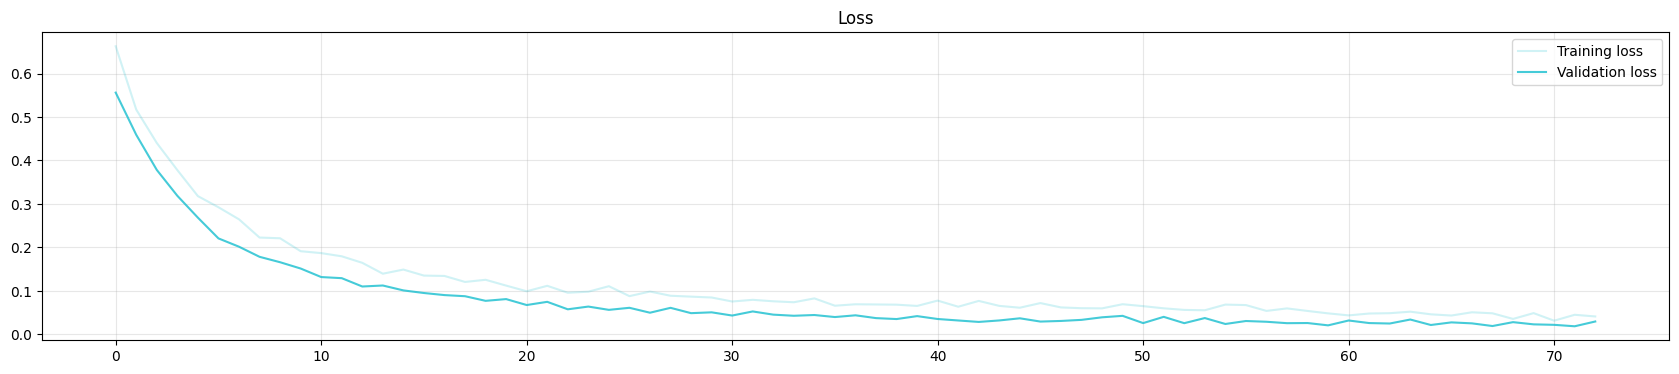

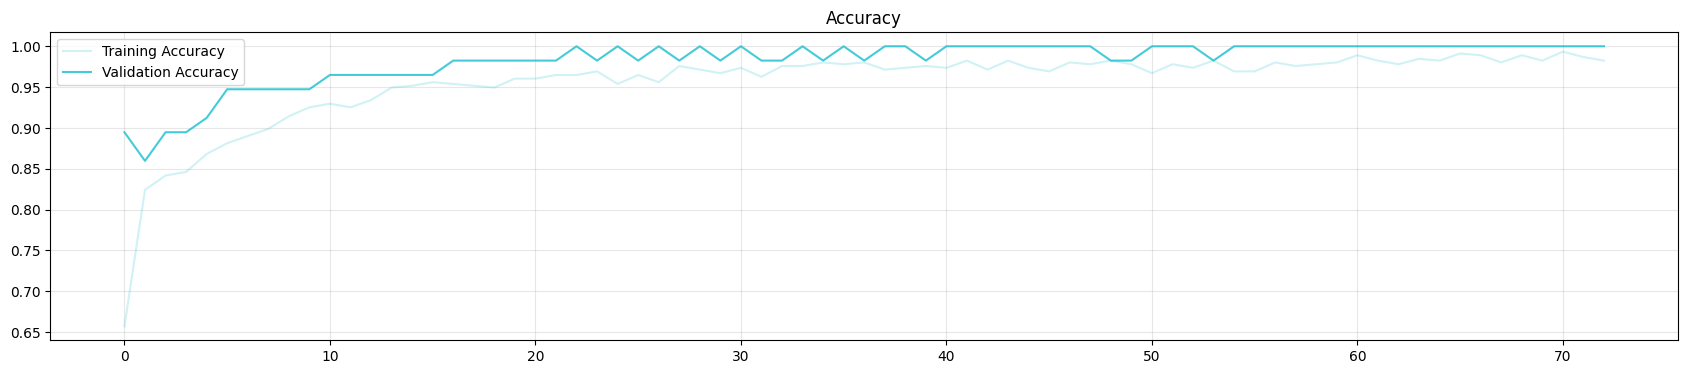

In [ ]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss
plt.plot(history['loss'][ignore:], label='Training loss', alpha=.2, color='#17becf')
plt.plot(history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#17becf')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation Accuracy
plt.plot(history['accuracy'][ignore:], label='Training Accuracy', alpha=.2, color='#17becf')
plt.plot(history['val_accuracy'][ignore:], label='Validation Accuracy', alpha=.8, color='#17becf')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

We can observe that the loss decreases, as expected, while the accuracy increases over the the epochs. This suggests that the model is learning in the correct way.

## Evaluation
During evaluation we want ot understand how the model performs on unseen data, which is represented by the test set.

We will evaluate the performance of the model using different methods such as accuracy, recall, precision and roc curve.


### Accuracy
Accuracy is the proportion of correctly classified instances. It returns the percentage of correct predictions.

Accuracy on training set:

In [ ]:
y_pred_train = (best_model.predict(X_train) > 0.5).astype(int)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy on training set: 0.9780


Accuracy on validation set:

In [ ]:
y_pred_val = (best_model.predict(X_val) > 0.5).astype(int)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy on validation set: {accuracy_val:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Accuracy on validation set: 1.0000


Accuracy on test set:

In [ ]:
y_pred_test = (best_model.predict(X_test) > 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy_test:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step 
Accuracy on test set: 0.9474


### ROC Curve
The ROC Curve graphically represents the performance of the classifier plotting the true positive rate against the false positive rate.

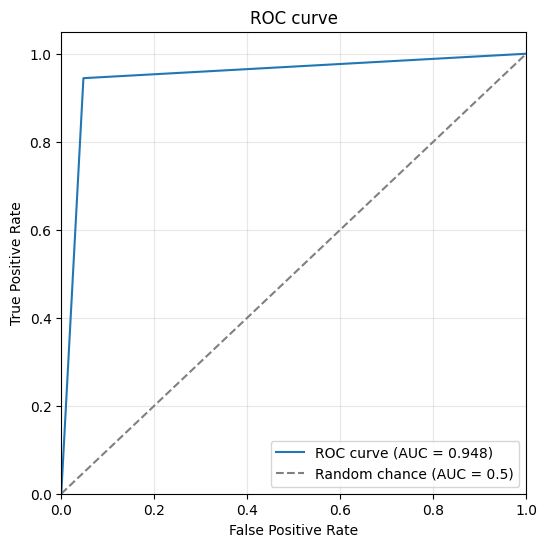

In [ ]:
fpr, tpr, T = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random chance (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### AUC Score
The AUC Score is the area under the ROC Curve.

In [ ]:
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9484


### Precision
Precision calculates the percentage of positive predictions that are actually correct.

In [ ]:
precision = precision_score(y_test, y_pred_test)
print(f"Precision: {precision:.4f}")

Precision: 0.9714


### Recall (Sensitivity)
Recall measures the proportion of positive instances correcty classified.

In [ ]:
recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.4f}")

Recall: 0.9444


### F1 score
The F1 score is the harmonic mean of precision and recall. It is particularly useful if the dataset is imbalanced.

In [ ]:
f1 = f1_score(y_test, y_pred_test)
print(f"F1 score: {f1:.4f}")

F1 score: 0.9577


### Confusion matrix
The confusion matrix is a powerful tool that enables us to get the number of correct and incorrect predictions for each class.

It return the count of True Positive, True Negative, False Positive and False Negative.

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[20,  1],
       [ 2, 34]])

We can observe that the model achieved high accuracy (train: 97.80%, validation: 100% and test: 94.74%) and an almost optimal ROC Curve. Moreover, the confusion matrix shows us that the system classified incorrectly only 3 instances.

By considering the different evaluation metrics we can conclude that the model is perfoming well, meaning that it is able to correctly classify unseen instances into the right class.

## K-fold cross-validation

We would like to understand the generalizability and stability of the model.

To do so we implemented a K-fold Cross-Validation, which allows us to observe the system's behavior across different folds.

K-fold Cross-Validation splits the data into k consecutive folds and at each iteration one of them is used as validation, while the remaining k-1 ones form the training set.

In [ ]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store training histories, scores, and best epochs
histories = []
scores = []
best_epochs = []

# Create a KFold cross-validation object
kfold = KFold(
    n_splits = num_folds,
    shuffle = True,
    random_state = seed)

# Loop through each fold
for fold, (train, valid) in enumerate(kfold.split(X_train_val, y_train_val)):

  print("Training on fold number: {}".format(fold+1))

  # Build a model for each fold
  k_model = create_model(
    learning_rate = best_params['learning_rate'], # Best learning rate
    dropout_rate = best_params['dropout_rate'],   # Best dropout rate
    num_hidden = best_params['num_hidden'],       # Best number of hidden layers
    num_neurons = best_params['num_neurons']      # Best numeber of neurons
  )

  # Train the model for this fold
  history = k_model.fit(
    x = X_train_val.iloc[train],
    y = y_train_val.iloc[train],
    validation_data=(X_train_val.iloc[valid], y_train_val.iloc[valid]),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [early_stopping],
    verbose = 0
  ).history

  # Evaluate the model on the validation data for this fold
  score = k_model.evaluate(X_train_val.iloc[valid], y_train_val.iloc[valid], verbose=0)
  scores.append(score[1])

  # Calculate the best epoch for early stopping
  best_epoch = len(history['loss']) - patience
  best_epochs.append(best_epoch)

  # Store the training history for this fold
  histories.append(history)

Training on fold number: 1
Training on fold number: 2
Training on fold number: 3
Training on fold number: 4
Training on fold number: 5
Training on fold number: 6
Training on fold number: 7
Training on fold number: 8
Training on fold number: 9
Training on fold number: 10


Plot the accuracy across the 10 different folds.

Accuracy
Mean: 0.9433
Std:  0.0334


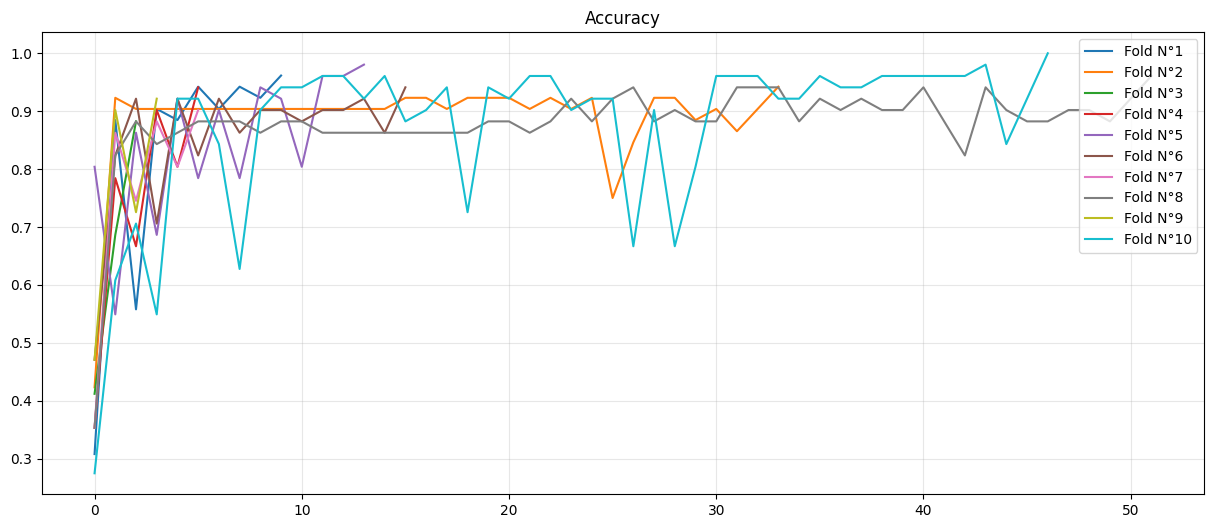

In [ ]:
# Define a list of colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Print mean and standard deviation of accuracy
print("Accuracy")
print(f"Mean: {np.mean(scores):.4f}\nStd:  {np.std(scores):.4f}")

# Create a figure for MSE visualization
plt.figure(figsize=(15,6))

# Plot Accuracy for each fold
for fold in range(num_folds):
  plt.plot(histories[fold]['val_accuracy'][:-patience], color=colors[fold], label=f'Fold N°{fold+1}')
  plt.ylim()
  plt.title('Accuracy')
  plt.legend(loc='upper right')
  plt.grid(alpha=.3)

# Show the plot
plt.show()

The graph indicates a mean accuracy of 94.33% that indicates a good performance of the model and a standard deviation of 3.34%, which suggests model stability and consistency.

Moreover, we can observe that the accuracy has similar behaviors across the different folds, indicating generalizability.